<a href="https://colab.research.google.com/github/vlnt1/UAS-AI/blob/main/KlasifikasiObesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klasifikasi Obesitas menggunakan KNN
Dibuat oleh : Michael_valentino_laisina

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fdata="https://raw.githubusercontent.com/vlnt1/UAS-AI/main/dataset/Obesity%20Classification.csv"

df = pd.read_csv(fdata)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [5]:
#Cek Jumlah data, jumlah duplikasi, dan jumlah setelah dihapus baris duplikasi
print(f"Jumlah data : {df.shape[0]}")
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}")
#Drop duplicated
df.drop_duplicates(inplace=True)
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")

Jumlah data : 108
Jumlah data duplikasi : 0
Jumlah setelah dihapus data duplikasi : 108


In [6]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [10]:
from sklearn.model_selection import train_test_split

# Check the column names in the DataFrame
print(df.columns)

# Assuming the column name is 'Gender' and not 'gender' (Case sensitivity issue)
y = df['Gender']  # Access column using bracket notation with correct column name
X = df.drop("Gender", axis=1)  # Drop the correct column name

# If the column name is different, find the correct name
# and update the code accordingly.

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')


In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True, stratify=y,random_state=12)
print(f"Jumlah data train : {len(x_train)}")
print(f"Jumlah data test : {len(x_test)}")

Jumlah data train : 86
Jumlah data test : 22


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector

# Assuming 'NObeese' column has the string 'Obese' causing the issue
# ... (previous code) ...


# Create a pipeline with ColumnTransformer for specific data types
num_pipeline = Pipeline([
    ('num', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# Use make_column_selector to automatically select columns by data type
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
        ('cat', cat_pipeline, make_column_selector(dtype_include=object)),
    ])

# Apply the preprocessor to your data
x_train_scl = preprocessor.fit_transform(x_train)
x_test_scl = preprocessor.transform(x_test)

encoder = LabelEncoder()

# Fit and transform y_train
y_train_enc = encoder.fit_transform(y_train)

# Encode y_test using the same encoder
y_test_enc = encoder.transform(y_test)  # Add this line to encode y_test

# ... (rest of your code) ...

# ... (rest of your code) ...

In [14]:
x_train

,ID,Age,Height,Weight,BMI,Label
16,17,48,200,100,31.2,Obese
69,72,20,160,30,13.3,Underweight
90,93,48,130,40,16.7,Underweight
84,87,18,160,20,8.3,Underweight
65,68,51,130,65,22.7,Normal Weight
...,...,...,...,...,...,...
19,21,63,120,30,13.3,Underweight
64,67,46,200,85,26.1,Overweight
35,38,54,130,85,27.5,Overweight
99,102,42,200,30,13.3,Underweight


In [16]:
x_train_scl

array([[-1.37176353e+00,  1.60759683e-01,  1.17062223e+00,
         1.36863803e+00,  1.38479240e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.25588685e-01, -1.07207253e+00, -2.70143591e-01,
        -1.00235505e+00, -9.24294930e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.11185044e+00,  1.60759683e-01, -1.35071796e+00,
        -6.63641752e-01, -4.85697336e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 9.15775652e-01, -1.16013198e+00, -2.70143591e-01,
        -1.34106835e+00, -1.56929139e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 2.94872160e-01,  2.92848849e-01, -1.35071796e+00,
         1.83141492e-01,  2.88298419e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.85059128e-01, -8.95953646e-01,  4.50239319e-01,
        -4.94285103e-01, -2.27698751e-01,  0.000000

In [17]:
y_train

,Gender
16,Male
69,Female
90,Female
84,Female
65,Female
...,...
19,Female
64,Male
35,Female
99,Male


In [27]:
y_train_enc

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scl, y_train_enc)

KNeighborsClassifier()

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
knn_predictions = knn_classifier.predict(x_test_scl)
knn_accuracy = accuracy_score(y_test_enc , knn_predictions)

print(f'KNN accuracy: {knn_accuracy:.2f}')

KNN accuracy: 1.00


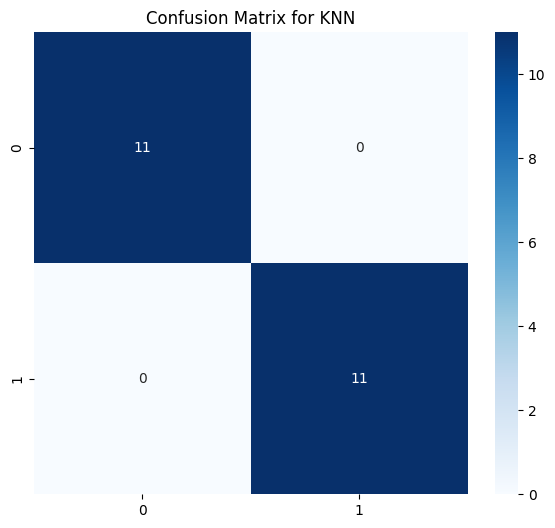

In [33]:
cm=confusion_matrix(y_test_enc,knn_predictions)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for KNN')
plt.show()

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
knn=KNeighborsClassifier(n_neighbors=5)
score_sc=cross_val_score(knn,x_train_scl,y_train_enc,cv=5)
print(score_sc)
print(f"Rata score dengan 5 fold : {score_sc.mean()}")

[1.         0.94117647 0.94117647 1.         0.88235294]
Rata score dengan 5 fold : 0.9529411764705882


In [36]:
n_=range(1,51,2)
train,test=[],[]
for n in n_:
  knn=KNeighborsClassifier(n_neighbors=n)
  knn.fit(x_train_scl,y_train_enc)
  train.append(knn.score(x_train_scl,y_train_enc))
  test.append(knn.score(x_test_scl,y_test_enc))

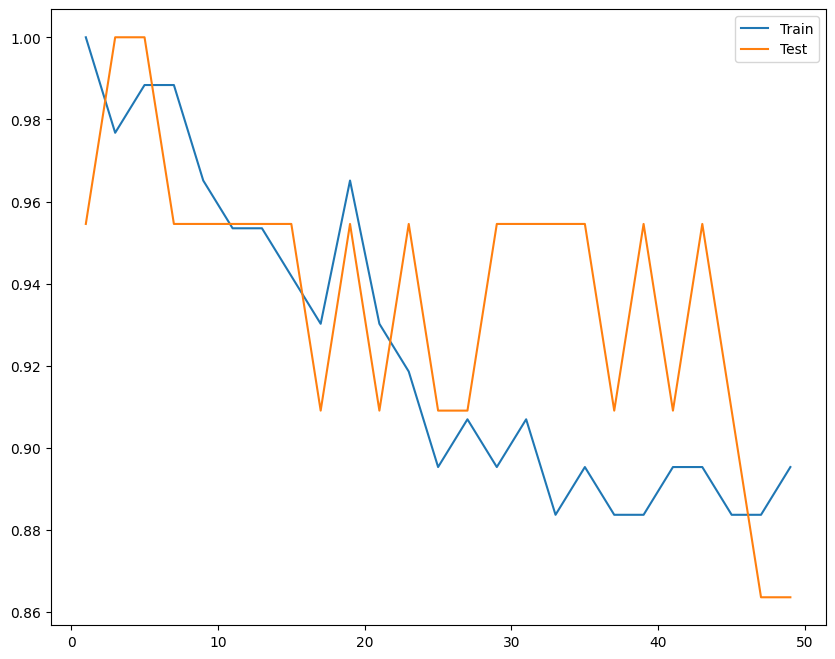

In [37]:
plt.figure(figsize=(10,8))
plt.plot(n_,train, label='Train')
plt.plot(n_,test, label='Test')

plt.legend()
plt.show()

In [38]:
print(f"Max Test Score adalah {np.max(test)}")
print(f"K Neighboard terbaik adalah {n_[np.argmax(test)]}")

Max Test Score adalah 1.0
K Neighboard terbaik adalah 3
